<a href="https://colab.research.google.com/github/springboardmentor447/AI_STYLIST_Infosys_Internship_Oct2024/blob/Mohammed-ghouse/Ai_stylist_milestone_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Exploring Data


In [23]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_json('/content/drive/MyDrive/fashion_products_data.ldjson', lines = True)
print("dataset loaded")
print(df.shape)
print(df.info())
print(df.describe())
print(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
dataset loaded
(30000, 33)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 33 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   uniq_id                        30000 non-null  object 
 1   crawl_timestamp                30000 non-null  object 
 2   asin                           30000 non-null  object 
 3   product_url                    30000 non-null  object 
 4   product_name                   30000 non-null  object 
 5   image_urls__small              29998 non-null  object 
 6   medium                         29998 non-null  object 
 7   large                          28841 non-null  object 
 8   browsenode                     29480 non-null  float64
 9   brand                          21857 non-null  object 
 10  sales_pric

### Data Cleaning and Droping Unwanted Columns

In [24]:
# Check for missing values
missing_values = df.isnull().sum()
# Drop irrelevant columns like 'seller_id'and 'weight'
df_cleaned = df.drop(columns=['seller_id', 'weight'])
# Drop columns with more than 80% missing values (like technical details)
df_cleaned = df_cleaned.dropna(thresh=int(0.15 * len(df_cleaned)), axis=1)
# After dropping columns with too many missing values, drop rows with any remaining nulls
df_cleaned = df_cleaned.dropna ()
columns_to_keep = ['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']

# Filter the dataset to keep only the specified columns
df_cleaned = df_cleaned[columns_to_keep]

# Display cleaned dataset shape
print(f"Cleaned Dataset Shape: {df_cleaned.shape}")
print(f"Columns after cleaning: {df_cleaned.columns.tolist()}")

Cleaned Dataset Shape: (1130, 8)
Columns after cleaning: ['asin', 'product_url', 'product_name', 'sales_price', 'rating', 'meta_keywords', 'medium', 'brand']


### Data Visualization

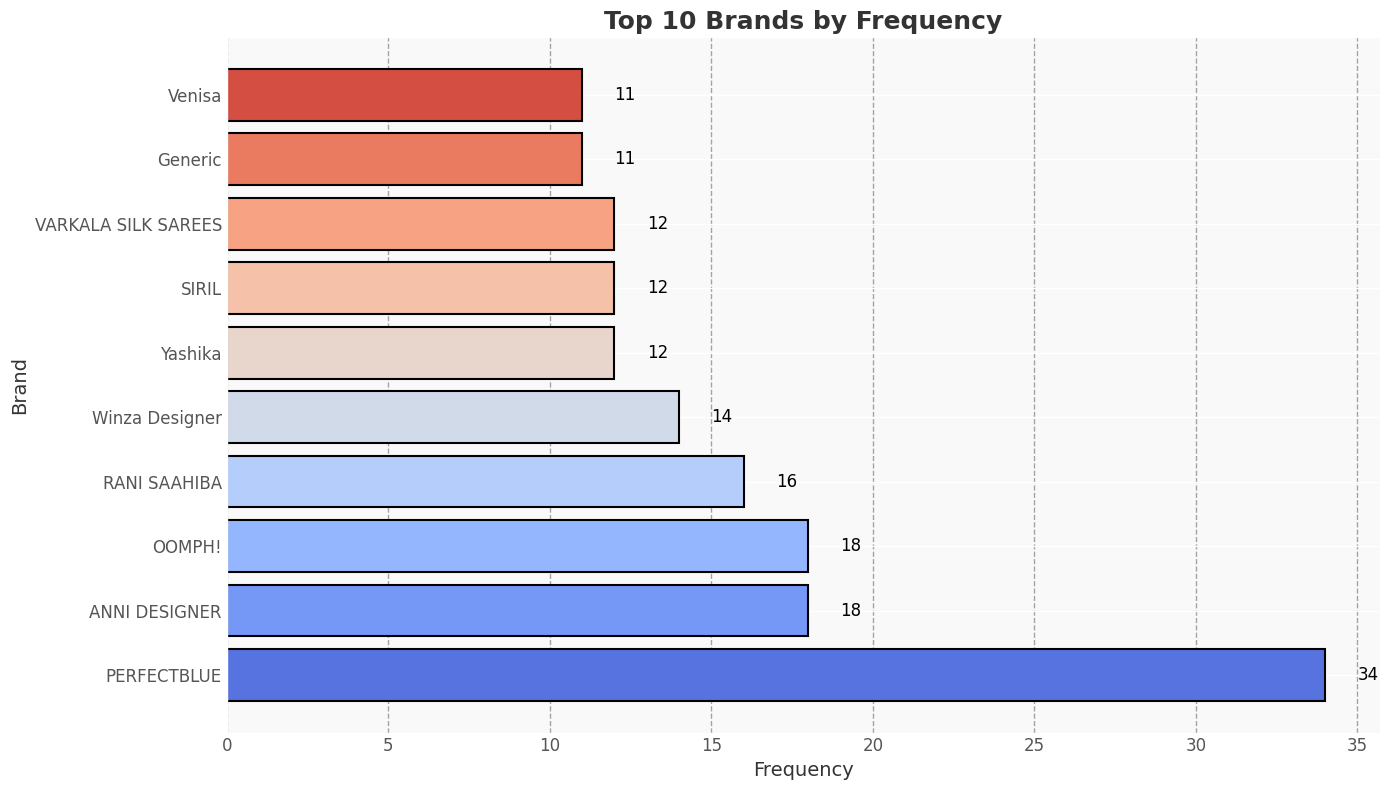

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a valid built-in style
plt.style.use('ggplot')

# Set figure size for better clarity
fig, ax = plt.subplots(figsize=(14, 8))

# Get top 10 brands by frequency
top_brands = df_cleaned['brand'].value_counts().nlargest(10)

# Custom color palette
custom_palette = sns.color_palette("coolwarm", n_colors=10)

# Create a horizontal bar plot
bars = ax.barh(top_brands.index, top_brands.values, color=custom_palette, edgecolor='black', linewidth=1.5)

# Add a title and labels with custom styling
ax.set_title('Top 10 Brands by Frequency', fontsize=18, fontweight='bold', color='#333333')
ax.set_xlabel('Frequency', fontsize=14, color='#333333')
ax.set_ylabel('Brand', fontsize=14, color='#333333')

# Rotate x-ticks for better readability
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines for better readability
ax.grid(axis='x', linestyle='--', color='gray', alpha=0.7)

# Annotate each bar with its value
for bar in bars:
    width = bar.get_width()
    ax.annotate(f'{int(width)}',
                xy=(width + 1, bar.get_y() + bar.get_height() / 2),
                ha='left', va='center',
                fontsize=12, color='black')

# Set the background color
ax.set_facecolor('#f9f9f9')

# Adjust layout to ensure everything fits well
plt.tight_layout()
plt.show()


### scatter Plot

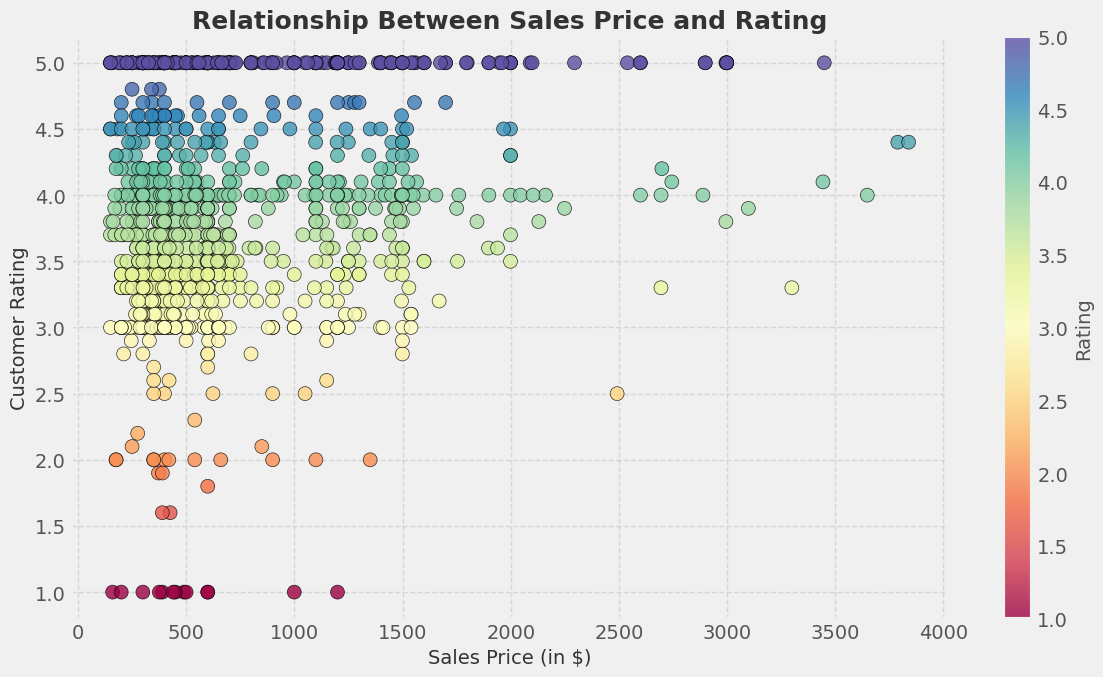

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Use a different style for a unique look
plt.style.use('fivethirtyeight')

# Set up the figure size
fig, ax = plt.subplots(figsize=(12, 7))

# Create a custom color palette based on rating
colors = sns.color_palette('Spectral', as_cmap=True)

# Enhanced scatter plot with hue based on the 'rating' column and a color gradient
scatter = ax.scatter(
    x=df_cleaned['sales_price'],
    y=df_cleaned['rating'],
    c=df_cleaned['rating'],
    cmap=colors,
    s=100,  # Increased marker size for better visibility
    alpha=0.8,  # Transparency for overlapping points
    edgecolor='black'  # Edge color for markers
)

# Add a color bar for better interpretation of the rating scale
cbar = plt.colorbar(scatter)
cbar.set_label('Rating', fontsize=14)

# Add a title and labels with custom styling
ax.set_title('Relationship Between Sales Price and Rating', fontsize=18, fontweight='bold', color='#333333')
ax.set_xlabel('Sales Price (in $)', fontsize=14, color='#333333')
ax.set_ylabel('Customer Rating', fontsize=14, color='#333333')

# Add grid lines for better readability
ax.grid(linestyle='--', alpha=0.7)

# Set background color
ax.set_facecolor('#f0f0f0')

# Display the plot with tight layout
plt.tight_layout()
plt.show()



### Correlation Matrix Heatmap

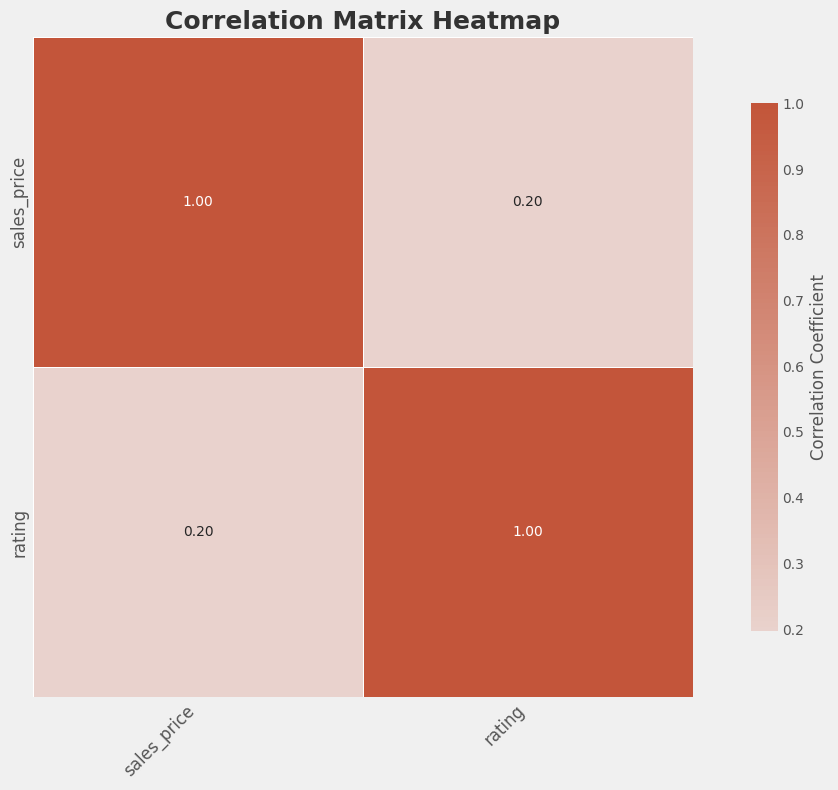

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Filter the DataFrame to include only numeric columns
numeric_df = df_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_df.corr()

# Set up the figure size and style
plt.figure(figsize=(12, 8))
plt.style.use('ggplot')

# Create a diverging colormap for better visual distinction
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot the heatmap
sns.heatmap(
    corr_matrix,
    annot=True,  # Display correlation values on the heatmap
    fmt=".2f",  # Format the numbers to 2 decimal places
    cmap=cmap,
    center=0,  # Center the colormap at 0 for diverging colors
    linewidths=0.5,  # Add space between cells
    linecolor='white',  # Line color for separation
    square=True,  # Make cells square-shaped
    cbar_kws={'shrink': 0.8, 'label': 'Correlation Coefficient'}  # Customize color bar
)

# Customize the title and labels
plt.title('Correlation Matrix Heatmap', fontsize=18, fontweight='bold', color='#333333')
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)

# Tight layout for better fitting
plt.tight_layout()

# Display the plot
plt.show()


### Sorting Data Frame


In [28]:

# Sort the DataFrame by the 'product_name' column in alphabetical order
sorted_df = df_cleaned.sort_values(by="product_name", ascending=True)

# Reset the index for a clean display
sorted_df.reset_index(drop=True, inplace=True)



### Removing non English Letters and Numbers

In [29]:
import re

def remove_non_english_letters_and_numbers(text):
    # Regular expression to remove non-English letters and non-numeric characters
    cleaned_text = re.sub(r'[^a-zA-Z0-9]', '', text)
    return cleaned_text

# Assuming 'data' is a DataFrame
sorted_df['product_name'] = sorted_df['product_name'].apply(remove_non_english_letters_and_numbers)

# Now print the modified 'product_name' column
print(sorted_df['product_name'])

0              FreeDeliveryWomen2hookBraExtenderComboPack
1                 31DesignStreetWomensPhulkariBaghDupatta
2            6THAVENUESTREETWEARWomensCottonDressFreeSize
3       6THAVENUESTREETWEARWomensCottonJaipuriPrintMax...
4       9shinesLabelHosieryCottonNightywithFrontZipfor...
                              ...                        
1125    securityWomenUnderwearSetSexyLingerieSexBodydo...
1126                      sochosamjoBabyFrock1Yearto2Year
1127    swatikaEthnicIndianBhagalpuriwomensHandloomBan...
1128     swatikaWomensHandloomBhagalpuriPlainLinenDupatta
1129    womensartsilkkalamkariandbhagalpuristylesareew...
Name: product_name, Length: 1130, dtype: object


### Removing stop words

In [30]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download necessary resources for sentence tokenization
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing 'punkt_tab' resource


# Define stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    words = word_tokenize(text)
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

# Apply the function to the 'product_name' column
sorted_df['product_name'] = sorted_df['product_name'].apply(remove_stop_words)

# Display the updated DataFrame
print(sorted_df['product_name'])

0              FreeDeliveryWomen2hookBraExtenderComboPack
1                 31DesignStreetWomensPhulkariBaghDupatta
2            6THAVENUESTREETWEARWomensCottonDressFreeSize
3       6THAVENUESTREETWEARWomensCottonJaipuriPrintMax...
4       9shinesLabelHosieryCottonNightywithFrontZipfor...
                              ...                        
1125    securityWomenUnderwearSetSexyLingerieSexBodydo...
1126                      sochosamjoBabyFrock1Yearto2Year
1127    swatikaEthnicIndianBhagalpuriwomensHandloomBan...
1128     swatikaWomensHandloomBhagalpuriPlainLinenDupatta
1129    womensartsilkkalamkariandbhagalpuristylesareew...
Name: product_name, Length: 1130, dtype: object


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### Expanding contractions

In [31]:
import re

def expand_contractions(text):
    # Expanded dictionary of common contractions and their expansions
    contractions = {
        "i've": "I have",
        "i'm": "I am",
        "you're": "you are",
        "he's": "he is",
        "she's": "she is",
        "it's": "it is",
        "we're": "we are",
        "they're": "they are",
        "can't": "cannot",
        "won't": "will not",
        "don't": "do not",
        "doesn't": "does not",
        "didn't": "did not",
        "isn't": "is not",
        "aren't": "are not",
        "wasn't": "was not",
        "weren't": "were not",
        "hasn't": "has not",
        "haven't": "have not",
        "hadn't": "had not",
        "mightn't": "might not",
        "mustn't": "must not",
        "needn't": "need not",
        "shan't": "shall not",
        "shouldn't": "should not",
        "couldn't": "could not",
        "wouldn't": "would not",
        "let's": "let us",
        "that's": "that is",
        "what's": "what is",
        "who's": "who is",
        "where's": "where is",
        "why's": "why is",
        "how's": "how is",
        "here's": "here is",
        "there's": "there is",
        "who'd": "who would",
        "i'd": "I would",
        "you'd": "you would",
        "he'd": "he would",
        "she'd": "she would",
        "we'd": "we would",
        "they'd": "they would",
    }

    # Regular expression to match contractions
    contraction_pattern = re.compile(r'\b(?:' + '|'.join(contractions.keys()) + r')\b')

    # Function to replace contractions with their full forms
    def replace_contraction(match):
        return contractions[match.group(0).lower()]

    # Replace contractions in the text
    expanded_text = contraction_pattern.sub(replace_contraction, text)

    return expanded_text

# Apply contraction expansion to 'product_name' column
sorted_df['product_name'] = sorted_df['product_name'].apply(expand_contractions)

# Print the updated 'product_name' column
print(sorted_df['product_name'])

0              FreeDeliveryWomen2hookBraExtenderComboPack
1                 31DesignStreetWomensPhulkariBaghDupatta
2            6THAVENUESTREETWEARWomensCottonDressFreeSize
3       6THAVENUESTREETWEARWomensCottonJaipuriPrintMax...
4       9shinesLabelHosieryCottonNightywithFrontZipfor...
                              ...                        
1125    securityWomenUnderwearSetSexyLingerieSexBodydo...
1126                      sochosamjoBabyFrock1Yearto2Year
1127    swatikaEthnicIndianBhagalpuriwomensHandloomBan...
1128     swatikaWomensHandloomBhagalpuriPlainLinenDupatta
1129    womensartsilkkalamkariandbhagalpuristylesareew...
Name: product_name, Length: 1130, dtype: object


### Stemming

In [32]:
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

# Download necessary resources (only once)
nltk.download('punkt')

# Initialize stemmer
stemmer = PorterStemmer()

# Function to apply stemming to product name
def apply_stemming(text):
    # Tokenize the text into words
    words = word_tokenize(text)

    # Perform stemming on each word
    stemmed_words = [stemmer.stem(word) for word in words]

    # Reconstruct the text from stemmed words
    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

# Apply the stemming function to 'product_name' column
sorted_df['product_name'] = sorted_df['product_name'].apply(apply_stemming)

# Print the updated 'product_name' column with stemmed product names
print(sorted_df[['product_name']].head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                        product_name
0         freedeliverywomen2hookbraextendercombopack
1            31designstreetwomensphulkaribaghdupatta
2          6thavenuestreetwearwomenscottondressfrees
3  6thavenuestreetwearwomenscottonjaipuriprintmax...
4  9shineslabelhosierycottonnightywithfrontzipfor...
